# Iteration 1 
#### Author(s): Furqan Shiraz Khan (202035549), Saad Equbal Syed (202046116) ####

# **[Click here to go to Iteration 2 section](#iteration_2)** #

In this project we are using an Airbnb Amsterdam dataset that can be found here: https://www.kaggle.com/datasets/erikbruin/airbnb-amsterdam?select=listings.csv

The dataset has **16** variables.

## 1. Dateset Presentation
### Variable Descriptions:

1. **id**: id of the unit. 
*Uniquely identifies each row in the dataset*

2. **name**: name of the listed unit

3. **host_id**: id of the host of each unit. 
*Used to uniquely identify hosts.*

4. **host_name**: name of the host. 
*Can help us Identify if the host is an individual or a cooperation.*

5. **neighbourhood_group**: the area of amsterdam the unit is located in.

6. **neighbourhood**: the neighbourhood the unit is located in. 
*Identify which areas are popular for renting.*

7. **latitude**: the latitide of the unit. 
*Provides an exact location for the unit when used with longitude.*

8. **longitude**: the longitude of the unit. 

9. **room_type**: the type of room, for example could be private room or a house. 
*Can help identify which type of room is preferred.*

10. **price**: the price of the unit. 
*One of the most important variable, helps see many trends such as how price varies with which area a unit is located in.* 

11. **minimum_nights**: minimum amount of nights the guest has to stay. 

12. **number_of_reviews**: total number of reviews. 
*Can tell us how reliable a rating is.*

13. **last_review**: date of the last review posted.

14. **reviews_per_month**: number of reviews a unit gets monthly. 

15. **calculated_host_listings_count**: number of units a host has listed. 

16. **availability_365**: total number of days a listing is available during a year. 
*Can tell us how often a unit is available.*
 


### Variables to be used


* id is kept as it helps us identify each listing
* name is kept to provide some information about the listing
* host_name and host_id are also kept to identify the host and to make relationships with hosts (ex: which hosts are better)
* neighbourhood_group will be **removed** as it appears to be empty.
* neighbourhood is important as it will allow us to make relationships with location (ex: which location has the most units, etc)
* latitude and logitude is kept if we need to make graphs with location or for example, calculate how far a unit is from a popular tourist spot.
* room_type is important to distinguish between privates room, houses, apartments, etc. 
* price is kept as many trends can be formulated with it. (ex. expensive neighbourhoods or cheapest unit)
* minimum_nights is important as some units can only be rented for long-term, while others are short-term.
* number_of_reviews, reviews_per_month and last_review are kept to see if the unit has reliable ratings.
* calculated_host_listings_count will be **removed** as it doesn't offer much analysis.
* availability_365 will be kept as it tells us how often a unit is available and we can make useful relationships.

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [200]:
df = pd.read_csv("listings.csv", index_col=["id"]).sort_values("id")
#removing columns that are not needed
del df["neighbourhood_group"]
del df["calculated_host_listings_count"]
df.head(5)

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
id,,,,,,,,,,,,,
2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,44
3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,47
20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,198
25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,141
27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,199


### Descriptors of Variables 

From the table we can minimum_nights and reviews_per_month have similar mean and median. Mean and median of price is slightly different. But with number_of_reviews the mean and median are *drastically different*, this tell us that maybe there might be outliers present.

In [201]:
stats = ["mean", "median", "std", "var"]
df.agg({"price":stats, "minimum_nights": stats, "number_of_reviews":stats, "reviews_per_month":stats})

,price,minimum_nights,number_of_reviews,reviews_per_month
mean,152.181178,3.328707,21.560459,1.062080
median,125.000000,2.000000,8.000000,0.620000
std,145.828976,12.537419,43.240292,1.333320
var,21266.090344,157.186869,1869.722816,1.777742


From the graphs it is clear that none of the variables have a normal distribution. There are no negative values for any of the variables either. Most of data is cluttered near 0. number_of_reviews and reviews_per_month have a *similar patterns* and they might have an **exponential distribution.** With price and minimum_nights it is hard to tell what the distribution is.

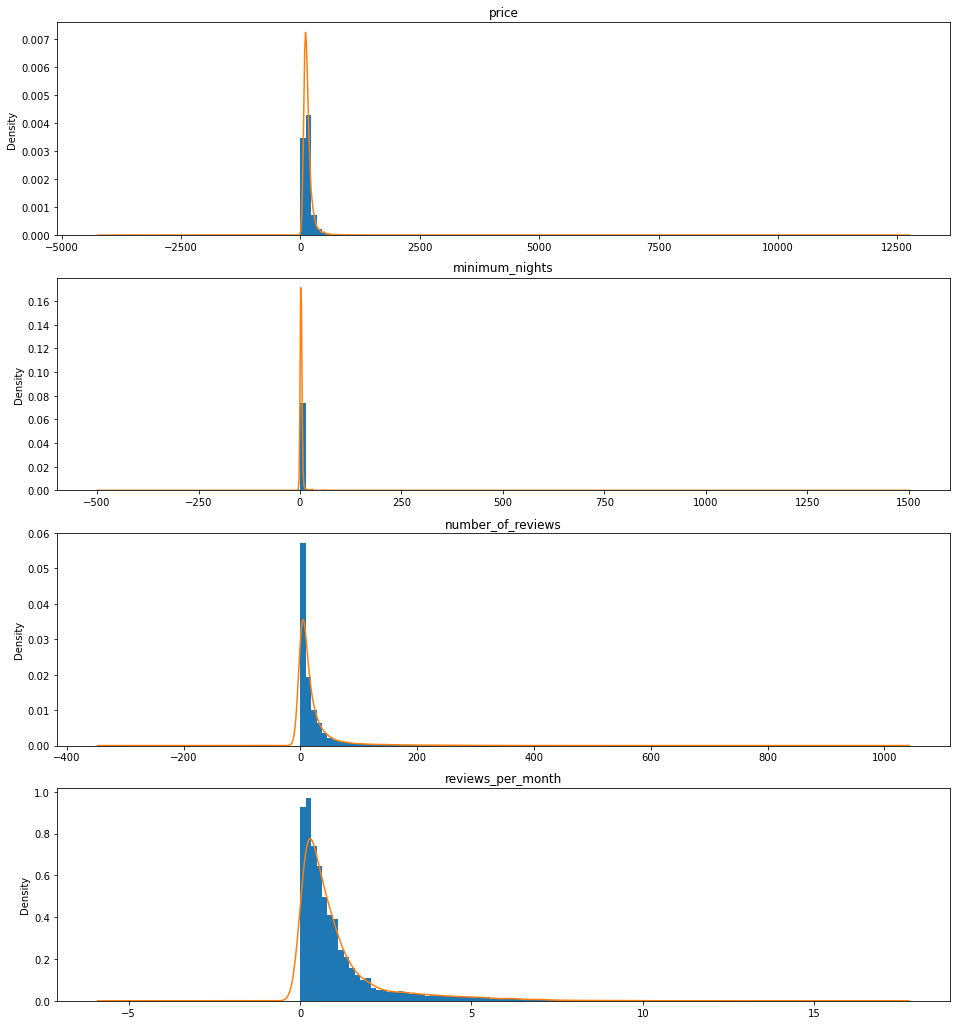

In [202]:
val_cols_names = ['price','minimum_nights','number_of_reviews','reviews_per_month']
def plot_histograms_density(ndf, columns):
    fig, axs = plt.subplots(len(columns),1,figsize=(16,18))
    i = 0
    for c in columns:
        ndf[c].hist(ax=axs[i], density=True, bins=75) # normalizes the density
        ndf[c].plot.density(ax=axs[i], title=c)
        i+=1
plot_histograms_density(df, val_cols_names)

From the boxplots it seems like there are many outliers, but from the the histogram above we know that none of the variables have a normal distribution and they are not outliers! So this behavior is normal. Most of the data is cluttered past the Upper Whisker.

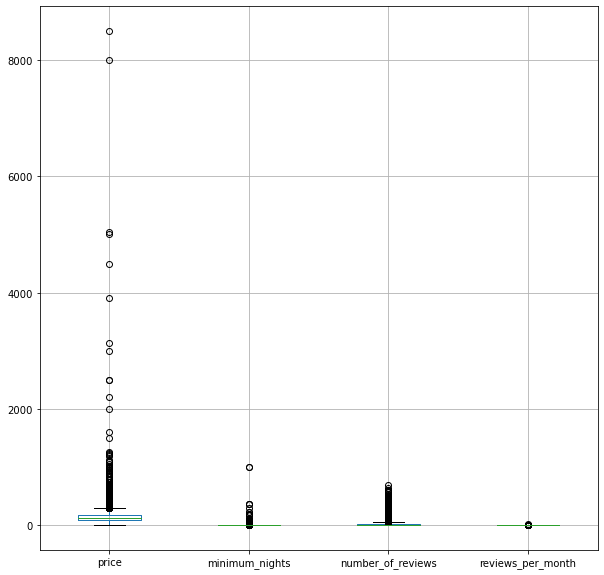

In [203]:
df.boxplot(column = val_cols_names, figsize= (10,10) )
plt.show()

## 2. Data Cleaning
### Dealing with missing values

We can see that there some missing values in the column, **name** and **host_name**. There are a lot of missing data in **last_review** and **reviews_per_month**.  

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 2818 to 30580413
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               19992 non-null  object 
 1   host_id            20030 non-null  int64  
 2   host_name          20026 non-null  object 
 3   neighbourhood      20030 non-null  object 
 4   latitude           20030 non-null  float64
 5   longitude          20030 non-null  float64
 6   room_type          20030 non-null  object 
 7   price              20030 non-null  int64  
 8   minimum_nights     20030 non-null  int64  
 9   number_of_reviews  20030 non-null  int64  
 10  last_review        17624 non-null  object 
 11  reviews_per_month  17624 non-null  float64
 12  availability_365   20030 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


We used *placeholder values* for name and host_name, as not many values were missing.
We dropped all rows with missing values in columns, **last_review** and **reviews_per_month**.

In [205]:
#replace missing values with empty
df["name"].fillna("Empty", inplace=True)
df["host_name"].fillna("Empty", inplace=True)

df.dropna(inplace=True) #it will remove rows with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17624 entries, 2818 to 30550093
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               17624 non-null  object 
 1   host_id            17624 non-null  int64  
 2   host_name          17624 non-null  object 
 3   neighbourhood      17624 non-null  object 
 4   latitude           17624 non-null  float64
 5   longitude          17624 non-null  float64
 6   room_type          17624 non-null  object 
 7   price              17624 non-null  int64  
 8   minimum_nights     17624 non-null  int64  
 9   number_of_reviews  17624 non-null  int64  
 10  last_review        17624 non-null  object 
 11  reviews_per_month  17624 non-null  float64
 12  availability_365   17624 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.9+ MB


### Dealing with Outliers

Any value outside of 3 standard deviation of the mean, will be replaced by max or min depending on where the outlier is located.

In [206]:
def replace_outliers_3times_std(df, columns):
    for c in columns:
        high_lim = df[c].mean() + 3*df[c].std()
        low_lim = df[c].mean() - 3*df[c].std()
        print(f"High ({c}):", high_lim)
        print(f"Low ({c}):", low_lim)
        df[c] = np.where(df[c] >= high_lim, high_lim, np.where(df[c] <= low_lim, low_lim, df[c]))

df_c = df.copy()        
replace_outliers_3times_std(df_c, val_cols_names)

High (price): 562.0512663503611
Low (price): -264.7074170539471
High (minimum_nights): 40.43612792205608
Low (minimum_nights): -34.09023595655449
High (number_of_reviews): 160.4302746883723
Low (number_of_reviews): -111.426643276661
High (reviews_per_month): 5.062040383427149
Low (reviews_per_month): -2.9378801473853904


Only max values changed, which tells us that the outliers are on the positive side.
number_of_reviews's mean and std are closer after the removal of the outliers.

In [207]:
df[val_cols_names].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month
count,17624.000000,17624.000000,17624.000000,17624.00000
mean,148.671925,3.172946,24.501816,1.06208
std,137.793114,12.421061,45.309486,1.33332
min,0.000000,1.000000,1.000000,0.01000
25%,96.000000,2.000000,4.000000,0.27000
50%,125.000000,2.000000,11.000000,0.62000
75%,175.000000,3.000000,25.000000,1.23000
max,8500.000000,1001.000000,695.000000,11.85000


In [208]:
df_c[val_cols_names].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month
count,17624.000000,17624.000000,17624.000000,17624.000000
mean,145.737613,2.917286,22.315210,1.023406
std,79.909336,3.185315,32.408231,1.169547
min,0.000000,1.000000,1.000000,0.010000
25%,96.000000,2.000000,4.000000,0.270000
50%,125.000000,2.000000,11.000000,0.620000
75%,175.000000,3.000000,25.000000,1.230000
max,562.051266,40.436128,160.430275,5.062040


In [209]:
df_c

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
id,,,,,,,,,,,,,
2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59.0,3.0,160.430275,2018-11-28,2.10,44
3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160.0,4.0,42.000000,2018-08-29,1.03,47
20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80.0,1.0,160.430275,2018-11-30,2.18,198
25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125.0,14.0,1.000000,2018-01-21,0.09,141
27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150.0,2.0,160.430275,2018-11-25,2.03,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30435529,Amsterdam,41867658,Tamara,De Baarsjes - Oud-West,52.365680,4.878104,Entire home/apt,85.0,2.0,1.000000,2018-12-04,1.00,45
30439111,Cozy Studio,204129335,Eleanna,Oud-Noord,52.405705,4.891644,Entire home/apt,65.0,3.0,1.000000,2018-12-02,1.00,9
30518120,1 Bedroom Apartment with Private Rooftop,13804495,Valentina,Bos en Lommer,52.375726,4.851131,Entire home/apt,40.0,1.0,1.000000,2018-12-04,1.00,155


<a id='iteration_2'></a>
# Iteration 2 #

## Part 1 – Addressing instructor’s comments from Iteration 1 ##

(d) Replotting the plots

Changed the number of bins to see the distribution better (histogram). Shows that most of the data is positively skewed.

Changed the y-axis of the boxplots to log, to better visualize the distribution of data. Shows that the price and minimum_nights have a much smaller variance than number_of_reviews and reviews_per_month. 

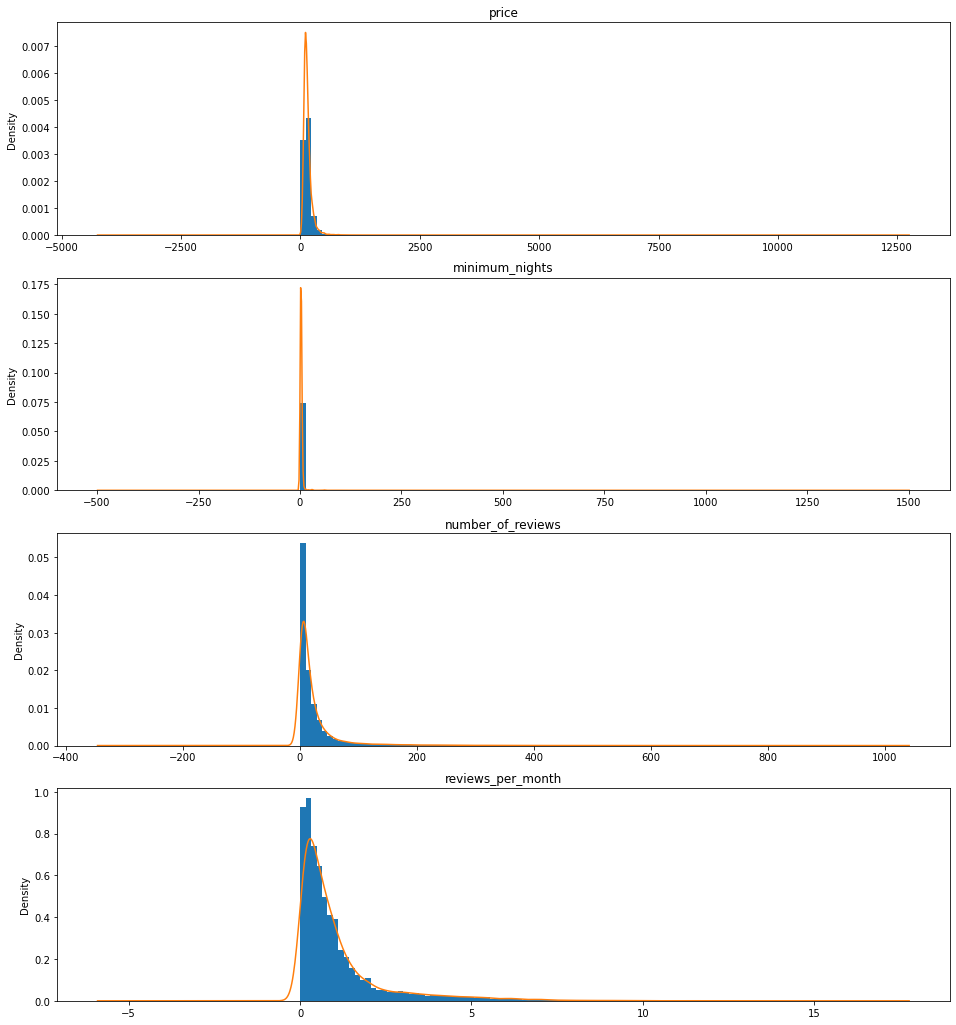

In [210]:
plot_histograms_density(df, val_cols_names) #changed the function to make it plot histograms with more bins

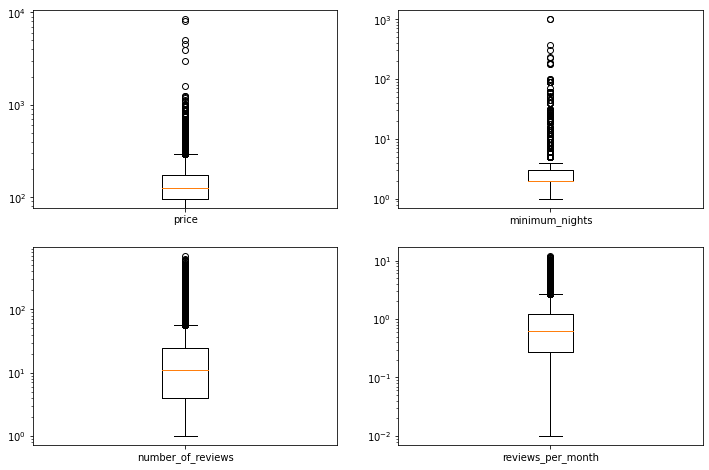

In [211]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs=axs.flatten() 
#changing y-axis to log to better observe the distribution
for ax in axs.flat:
    ax.set_yscale('log')

for i in range (len(val_cols_names)):
    column_name = val_cols_names[i]
    axs[i].boxplot(df[column_name], labels=[val_cols_names[i]])

(g)
Using a 95th percentile to remove outliers instead of using 3 times the standard deviation as the paramater for detecting outliers. 

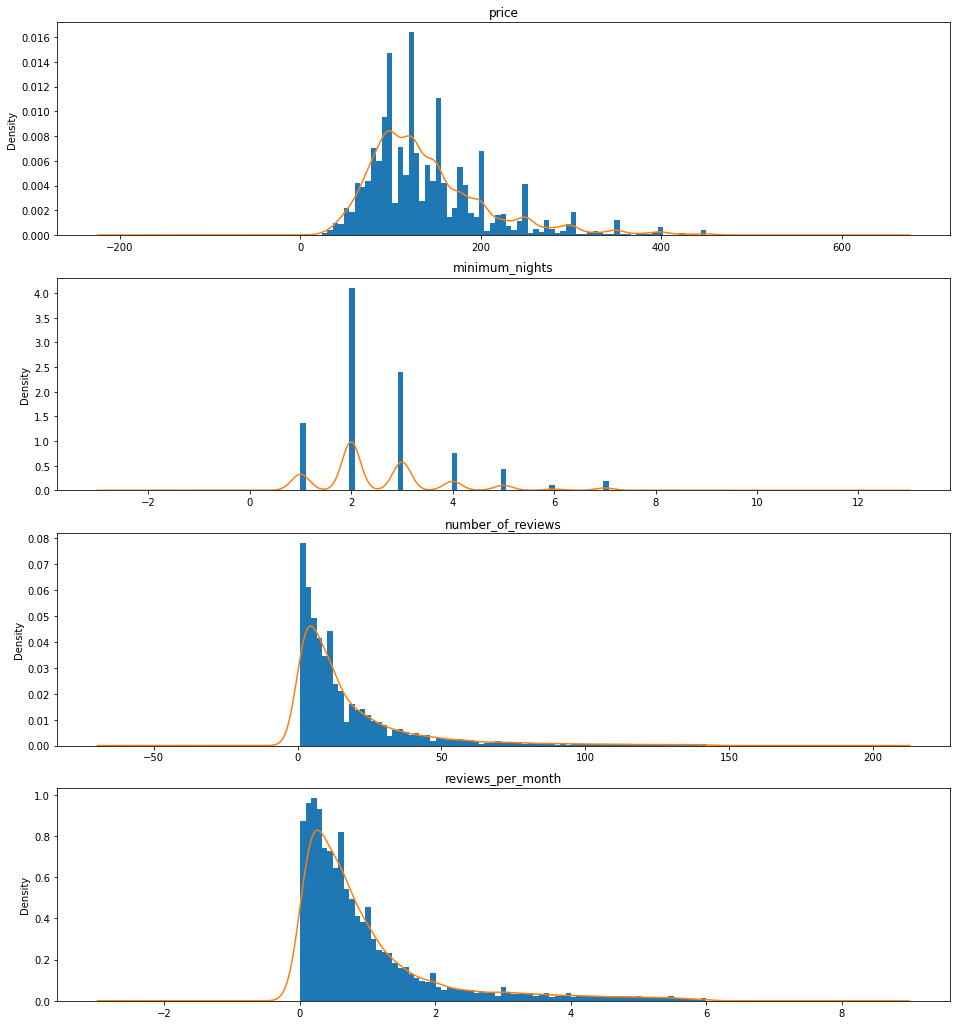

In [212]:
#replacing outliers (after 1.5 of the 95th percentile) with median
df_1 = df.copy()        
def replaceWith95th(df, columns):
    for c in columns:
        q95=df[c].quantile(0.95) * 1.5
        median=df[c].quantile(0.50)
        df[c] = np.where(df[c] > q95, median, df[c])

replaceWith95th(df_1, val_cols_names)
plot_histograms_density(df_1, val_cols_names)

## Part 2 – Data scaling pre-assessment ##

### Feature Engineering ###
Data in the dataset must be numerical to be used in a model, so we have to change some of the features in the dataset.

* We removed the **name**  column as the name of the listing doesn't have any colleration with last_review or reviews_per_month (columns with missing values).
* **host_name** and **host_id** represent the same entity, the host. And since we only need numerical values we dropped **host_name** column as well.
* Since **last_review** is a date, we used the built-in toordinal() method to change the dates to numerical values.
* For both **neighbourhood** and **room_type** we used a Label Enocder to encode the string values to numerical values.

In [213]:
df_1.head(4) #before encoding

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
id,,,,,,,,,,,,,
2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59.0,3.0,11.0,2018-11-28,2.10,44
3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160.0,4.0,42.0,2018-08-29,1.03,47
20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80.0,1.0,11.0,2018-11-30,2.18,198
25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125.0,2.0,1.0,2018-01-21,0.09,141


In [214]:
from sklearn.preprocessing import LabelEncoder

df_2 = df_1.copy()
#dropping name and host_name columns
df_2 = df_2.drop(["name", "host_name"], axis=1)
def encodingDf(df):
    #encoding the last_review column (ordinal encoder)
    df.loc[:,"last_review"] = pd.to_datetime(df.loc[:,"last_review"]) #converting to datetime data type
    df.loc[:,'last_review'] = df.loc[:,'last_review'].apply(lambda x: x.toordinal())

    #encoding the neighbourhood and room_type (label encoder)
    le = LabelEncoder() 
    df.loc[:,'neighbourhood'] = le.fit_transform(df.loc[:,'neighbourhood'])
    df.loc[:,'room_type'] = le.fit_transform(df.loc[:,'room_type'])
    return df

df_2 = encodingDf(df_2)
df_2.head(4)



,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
id,,,,,,,,,,,
2818,3159,14,52.365755,4.941419,1,59.0,3.0,11.0,737026,2.10,44
3209,3806,20,52.390225,4.873924,0,160.0,4.0,42.0,736935,1.03,47
20168,59484,4,52.365087,4.893541,0,80.0,1.0,11.0,737028,2.18,198
25428,56142,5,52.373114,4.883668,0,125.0,2.0,1.0,736715,0.09,141


### Data Scaling ###
* Since we have data with skewness, Minmax Scaler is not Ideal. So it will not be used. 


* Since most of the data is skewed and not normally distributed, it is not ideal to use Normilzer Scaler. So Normilzer will not be used.


* **MaxAbs Scaler** can be used as it does not change the distribution of the original data but it is not robust against outliers.


* **Robust Scaler** can also be used as it is robust against potentail outliers.


* Quantile Scaler maps the current distribution to another, this changed the distribution of our data which is not Ideal. It works well with bimodal and uniform data, since our data is mostly skewed we won't be using this scaler either.


* Log scaler works well with Normal data, again since most of our data is skewed this scaler will not be ideal. Log scaler also drastically changes the distribution of data that is not normally distributed, which is inadequate for what we are trying to achieve.



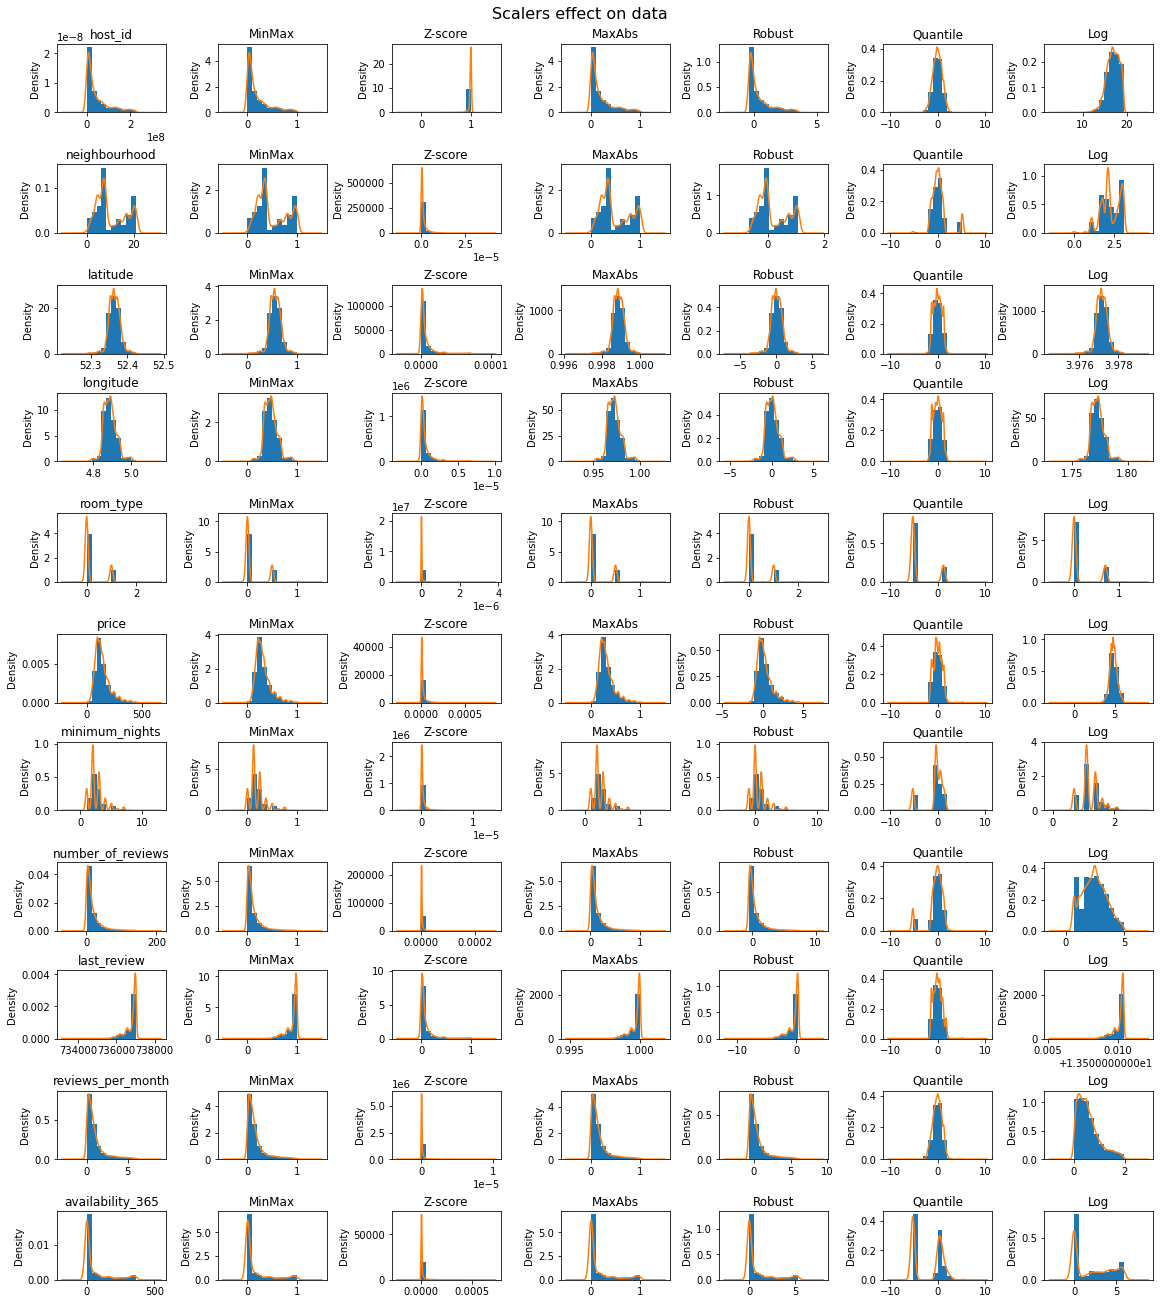

In [215]:
from sklearn.preprocessing import *
columns = df_2.columns.to_list()

def plot_histograms_density_for_scalers(df, columns, fig_title, scalers, scaler_names):
    fig, axs = plt.subplots(len(columns),len(scalers)+1,figsize=(16,18),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        df[c].hist(ax=axs[i], density=True) # normalizes the density
        df[c].plot.density(ax=axs[i], title=c)
        i+=1
        for j in range(len(scalers)):
            df_transformed = scalers[j].fit_transform(df)
            df_transformed = pd.DataFrame(df_transformed, index=df.index, columns=df.columns)
            df_transformed[c].hist(ax=axs[i], density=True, stacked=True) # normalizes the density
            df_transformed[c].plot.density(ax=axs[i], title=scaler_names[j])
            i+=1
            

scaler_names = ['MinMax', 'Z-score', 'MaxAbs', 'Robust', 'Quantile', 'Log']
arr_scalers = [MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal'),FunctionTransformer(np.log1p)]
plot_histograms_density_for_scalers(df_2, columns, 'Scalers effect on data', arr_scalers, scaler_names)

## Part 3 – Handling missing data and outliers ##
### Baseline Startegy ###
Making a baseline strategy that is used to measure the improvements made by the models

In our baseline strategy we replaced missing values with medians as the data is skewed. We also replaced outliers with median since the data is positively skewed.

In [216]:
from sklearn.dummy import DummyRegressor
baseline_model = DummyRegressor(strategy="median")

### Modelling ###

#### Preparing a dataframe for modelling ####

In [217]:
df = pd.read_csv("listings.csv", index_col=["id"]).sort_values("id")
df.info()

#THIS WAS ALL DONE IN ITERATION 1 
#replace missing values with empty as not many rows are missing values for this columns.
df["name"].fillna("Empty", inplace=True)
df["host_name"].fillna("Empty", inplace=True)
#removing columns that are not needed
del df["neighbourhood_group"]
del df["calculated_host_listings_count"]

#dropping name and host_name columns
df = df.drop(["name", "host_name"], axis=1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 2818 to 30580413
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            19992 non-null  object 
 1   host_id                         20030 non-null  int64  
 2   host_name                       20026 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   20030 non-null  object 
 5   latitude                        20030 non-null  float64
 6   longitude                       20030 non-null  float64
 7   room_type                       20030 non-null  object 
 8   price                           20030 non-null  int64  
 9   minimum_nights                  20030 non-null  int64  
 10  number_of_reviews               20030 non-null  int64  
 11  last_review                     17624 non-null  object 
 12  reviews_per_month         

In [218]:
df.info() #df is the dataframe with missing values and outliers after removing cols that are not needed
#encoding the neighbourhood and room_type (label encoder)
le = LabelEncoder() 
df.loc[:,'neighbourhood'] = le.fit_transform(df.loc[:,'neighbourhood'])
df.loc[:,'room_type'] = le.fit_transform(df.loc[:,'room_type'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 2818 to 30580413
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   host_id            20030 non-null  int64  
 1   neighbourhood      20030 non-null  object 
 2   latitude           20030 non-null  float64
 3   longitude          20030 non-null  float64
 4   room_type          20030 non-null  object 
 5   price              20030 non-null  int64  
 6   minimum_nights     20030 non-null  int64  
 7   number_of_reviews  20030 non-null  int64  
 8   last_review        17624 non-null  object 
 9   reviews_per_month  17624 non-null  float64
 10  availability_365   20030 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [219]:
# let's store the values missing in a variable
rows_to_fix = df[df.isna().any(axis=1)].copy()
#print(len(rows_to_fix))
# we will use the clean DF to create models
clean_df = df.dropna()
clean_df = encodingDf(clean_df)
clean_df.head(4)

C:\Users\furqa\AppData\Local\Temp\ipykernel_19688\1501885293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"last_review"] = pd.to_datetime(df.loc[:,"last_review"]) #converting to datetime data type
C:\Users\furqa\AppData\Local\Temp\ipykernel_19688\1501885293.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'last_review'] = df.loc[:,'last_review'].apply(lambda x: x.toordinal())
C:\Users\furqa\AppData\Local\Temp\ipykernel_19688\1501885293.py:13: SettingWithCopyWarning: 
A value is t

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
id,,,,,,,,,,,
2818,3159,14,52.365755,4.941419,1,59,3,248,737026,2.10,44
3209,3806,20,52.390225,4.873924,0,160,4,42,736935,1.03,47
20168,59484,4,52.365087,4.893541,0,80,1,233,737028,2.18,198
25428,56142,5,52.373114,4.883668,0,125,14,1,736715,0.09,141


#### Choosing a Model ####

We decided to go with **Linear Regression + Robust scaler** as our Model + Scaler Combination. Linear Regression is a better model than KNN Regressor as with raw data. Scaling techiniques do not have any impact on Linear Regression model (see below) so the scaling technique doesn't matter, so we just chose Robust Scaler.

MSE was used as the performance metric as it tells us how concentrated the data is around the line of best fit. Therefore, it is a good option for regression and also for our problem.

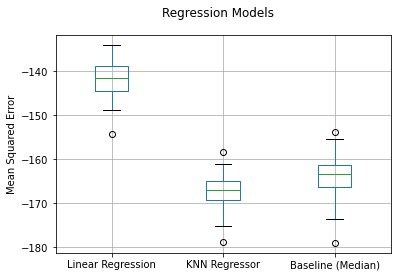

In [220]:
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.model_selection import *

lin_model = LinearRegression()
knn_model = KNeighborsRegressor(n_neighbors=3)

# X is all the other variables
X = clean_df.drop(['last_review', 'reviews_per_month'], axis=1).to_numpy()
# y is columns that we want to forecast
y = clean_df[['last_review', 'reviews_per_month']].to_numpy()

# Let's estimate the values for several rounds of crossvalidation
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
lin_scores = cross_val_score(lin_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
knn_scores = cross_val_score(knn_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
baseline_scores = cross_val_score(baseline_model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# Let's merge all results to create a boxplot
df_outcomes = pd.DataFrame(lin_scores)
df_outcomes['KNN'] = knn_scores
df_outcomes['Baseline'] = baseline_scores
df_outcomes.columns = ['Linear Regression', 'KNN Regressor', "Baseline (Median)"]
# Finally let's plot 
boxplot = df_outcomes.boxplot() 
boxplot.set_ylabel('Mean Squared Error')
plt.suptitle('Regression Models')
plt.show()

Without data scaling, Linear Regression is better than KNN Regessor as the negated value of MSE of Linear Regression is much higher at -142, while KNN regressor is at -165. In fact KNN regressor is worse than the baseline model, indicating that this model might not be compatible with this problem.

#### Choosing a Scaling Technique ####

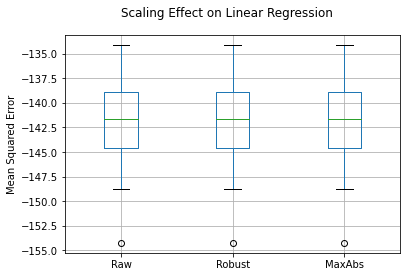

In [221]:
#returns values for a specific model + scalar combination
def forcasting_values(df, model, scalar):
    # X has the inputs
    X = clean_df.drop(['last_review', 'reviews_per_month'], axis=1).to_numpy()
    if scalar is not None: #for non raw data
        X = scalar.fit_transform(X)
    # y is the output to be forcasted
    y = clean_df[['last_review', 'reviews_per_month']].to_numpy()
    # Let's estimate the values for several rounds of cross-validation. 
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    return cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

def transformingDf(df, scaler):
    scaler_tdf = scaler.fit_transform(df)
    scaler_tdf = pd.DataFrame(scaler_tdf, index=df.index, columns=df.columns)
    return scaler_tdf

#forcasted scores
#raw data without scaling
raw_lin_scores = forcasting_values(clean_df, lin_model, None)

#robust scaling
# transform the data
robust_tdf = transformingDf(clean_df, RobustScaler())
robust_lin_scores = forcasting_values(robust_tdf, lin_model, RobustScaler())

#maxabs scaling
maxabs_tdf = transformingDf(clean_df, MaxAbsScaler())
maxabs_lin_scores = forcasting_values(maxabs_tdf, lin_model, MaxAbsScaler())

#outputting the results
def plotting_boxplots(scores, columns, title, error):
    df_outcome = pd.DataFrame(scores[0])
    for i in range(1,len(columns)):
        df_outcome[columns[i]] = scores[i]
    df_outcome.columns = columns
    
    boxplot = df_outcome.boxplot()
    boxplot.set_ylabel(error)
    plt.suptitle(title)
    plt.show()

error = 'Mean Squared Error'
title = 'Scaling Effect on Linear Regression'
scores = [raw_lin_scores, robust_lin_scores, maxabs_lin_scores]
columns = ["Raw","Robust","MaxAbs"]
plotting_boxplots(scores, columns, title, error)

This shows that scaling techniques has no effect on the Linear Regression model, as each scaling technique has the same MSE value.

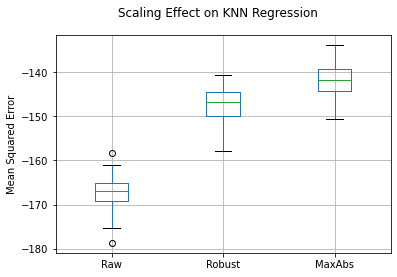

In [222]:
#forcasted scores
raw_knn_scores = forcasting_values(clean_df,knn_model, None)
robust_knn_scores = forcasting_values(robust_tdf,knn_model,RobustScaler())
maxabs_knn_scores = forcasting_values(maxabs_tdf,knn_model, MaxAbsScaler())


#outputting the results
title = 'Scaling Effect on KNN Regression'
scores = [raw_knn_scores, robust_knn_scores, maxabs_knn_scores]
plotting_boxplots(scores, columns, title, error)


Scaling techniques do impact the KNN regression model. MaxAbs has improved the performance by 24 point and has the greatest negated MSE value at 142, which is similar to Linear Regression.

### Adding forecasted values ###

In [223]:
#training the model
scl = RobustScaler()
model = LinearRegression()

# X is all the other variables
X = clean_df.drop(['last_review', 'reviews_per_month'], axis=1).to_numpy()
X_t = scl.fit_transform(X)
# y is columns that we want to forecast
y = clean_df[['last_review', 'reviews_per_month']].to_numpy()

model.fit(X_t, y)

# Now let's forecast the rows with missing values
X_pred = scl.transform(rows_to_fix.drop(['last_review', 'reviews_per_month'], axis=1).to_numpy())
y_pred = model.predict(X_pred)

# Now let's put the rows back with the forecasted values
rows_to_fix[['last_review', 'reviews_per_month']] = y_pred
clean_df = clean_df.append(rows_to_fix).reset_index()
#converting the dates back to normal format
clean_df['last_review']= clean_df['last_review'].apply(lambda x: pd.Timestamp.fromordinal(int(x))) 

clean_df

C:\Users\furqa\AppData\Local\Temp\ipykernel_19688\3962048469.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean_df = clean_df.append(rows_to_fix).reset_index()


,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,2818,3159,14,52.365755,4.941419,1,59,3,248,2018-11-28,2.100000,44
1,3209,3806,20,52.390225,4.873924,0,160,4,42,2018-08-29,1.030000,47
2,20168,59484,4,52.365087,4.893541,0,80,1,233,2018-11-30,2.180000,198
3,25428,56142,5,52.373114,4.883668,0,125,14,1,2018-01-21,0.090000,141
4,27886,97647,5,52.386727,4.892078,1,150,2,171,2018-11-25,2.030000,199
...,...,...,...,...,...,...,...,...,...,...,...,...
20025,30576148,13399651,19,52.345999,4.952145,0,340,7,0,2018-01-14,0.183605,11
20026,30577727,1595885,14,52.362412,4.932467,0,150,3,0,2018-01-11,0.171623,16
20027,30578037,87866499,17,52.362431,4.926912,0,80,10,0,2018-06-25,0.808208,210
20028,30579673,1595885,14,52.363780,4.932493,1,55,2,0,2018-01-02,0.806298,31


In [224]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 20030 non-null  int64         
 1   host_id            20030 non-null  int64         
 2   neighbourhood      20030 non-null  int64         
 3   latitude           20030 non-null  float64       
 4   longitude          20030 non-null  float64       
 5   room_type          20030 non-null  int64         
 6   price              20030 non-null  int64         
 7   minimum_nights     20030 non-null  int64         
 8   number_of_reviews  20030 non-null  int64         
 9   last_review        20030 non-null  datetime64[ns]
 10  reviews_per_month  20030 non-null  float64       
 11  availability_365   20030 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1.8 MB
